In [1]:
import numpy as np
from numpy.linalg import norm
from numpy import array, zeros
import datetime
import matplotlib.pyplot as plt
import os
from matplotlib import pyplot as plot
%matplotlib inline

In [2]:
"""
total_time = 0.
dt = 1e-11
v = np.array([100.,0.,0.])
B = np.array([0.,0.,5.e-4])
pos = [np.array([0.,0.,0.])]
list_pos=[]
list_vels=[]


q = 1.6*1e-19 #C
m = 9.31*1e-31
def calculate_acceleration(v):
    return q*np.cross(v,B)/m
    

while total_time<7e-8:
    vNplusHalf = v + 0.5*dt*calculate_acceleration(v)
    #print vNplusHalf
    pos = pos + dt*vNplusHalf
    v = vNplusHalf + 0.5*dt*calculate_acceleration(vNplusHalf)
    
    total_time += dt
    list_pos.append(pos)
    list_vels.append(v)
    
plt.plot(np.array(list_pos)[:,0][:,0],np.array(list_pos)[:,0][:,1])
plt.show()
"""

'\ntotal_time = 0.\ndt = 1e-11\nv = np.array([100.,0.,0.])\nB = np.array([0.,0.,5.e-4])\npos = [np.array([0.,0.,0.])]\nlist_pos=[]\nlist_vels=[]\n\n\nq = 1.6*1e-19 #C\nm = 9.31*1e-31\ndef calculate_acceleration(v):\n    return q*np.cross(v,B)/m\n    \n\nwhile total_time<7e-8:\n    vNplusHalf = v + 0.5*dt*calculate_acceleration(v)\n    #print vNplusHalf\n    pos = pos + dt*vNplusHalf\n    v = vNplusHalf + 0.5*dt*calculate_acceleration(vNplusHalf)\n    \n    total_time += dt\n    list_pos.append(pos)\n    list_vels.append(v)\n    \nplt.plot(np.array(list_pos)[:,0][:,0],np.array(list_pos)[:,0][:,1])\nplt.show()\n'

# Calculate for uniform density infinite cylinder case

total iterations: 200000
time elapsed: 0:00:15.063524
investigate B field


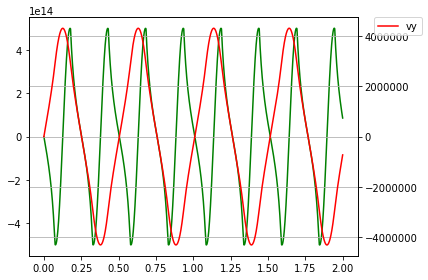

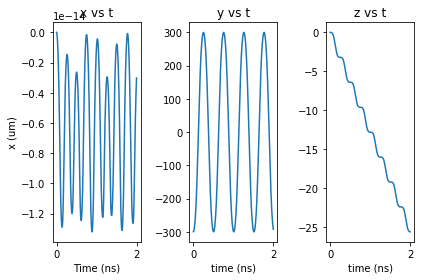

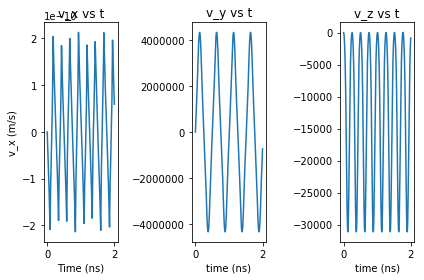

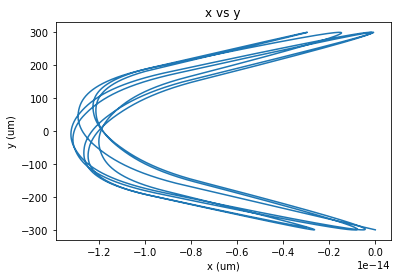

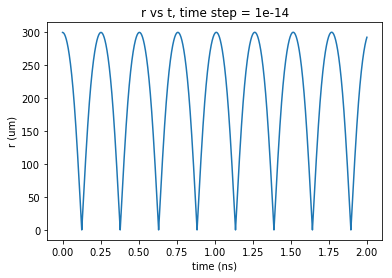

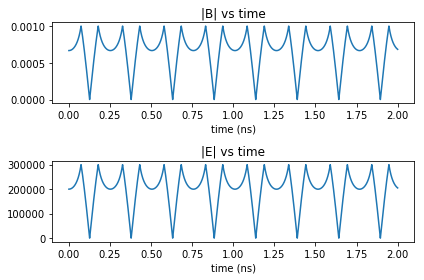

In [3]:

total_time = 0.
dt = 1e-14
v = np.array([0.,-100.,0.])
#B = np.array([0.,0.,5.e-4])
pos = np.array([0.,-300*1e-6,0.])
list_pos=[]
list_vels=[]
list_times=[]
list_elecField=[]
list_bField=[]
list_fZ=[]
list_theta=[]
list_accels=[]
list_radius=[]

q = -1.6*1e-19 #C
m = 9.31*1e-31
##### E calculation ####
epsilon0 = 8.85*1e-12
beta = 1.
c = 3*1e8
r0 = 200*1e-6
####B calculation ####
mu0 = 4*np.pi*1e-7

total_time_of_simulation = 2.e-9

def calculate_acceleration(v,pos1):

    #radial_distance = np.sqrt(((pos1)*(pos1)).sum())
    radial_distance = np.sqrt((pos[:2]**2).sum())
    
    #Behavior for function
    if radial_distance>r0:
        #return 1/r
        radius = 1./radial_distance
    else: 
        #return r/r0**2
        radius = radial_distance/(r0**2)
    
    Btheta = radius*(mu0/(2*np.pi))
    #print 'B shape' + str(Btheta.shape)
    Eradial = (1./(2*np.pi*epsilon0*beta*c))*radius
    #print 'Er' + str(Eradial.shape)
    theta = np.arctan2((pos1[1]),(pos1[0])) #in radians
    #print 'theta (deg): '+str(theta*np.pi/180)
    E = np.array([Eradial*np.cos(theta),Eradial*np.sin(theta),0.]) #Ex,Ey,Ez
    
    #############
    #Included signs in electric field
    signs_positions = np.sign(pos1)
    #############
    #print 'E: '+str(E)
    #B = np.array([-np.sin(theta)*Btheta,np.cos(theta)*Btheta,0.])#thetaHat = [-sin(theta),cos(theta),0]
    #correction - B = Btheta[sin(theta),-cos(theta),0]
    
    #2nd try
    #B = np.array([np.sin(theta)*Btheta,-1.*np.cos(theta)*Btheta,0.])#thetaHat = [-sin(theta),cos(theta),0]
    B = np.array([Btheta*np.sign(pos1[1]),-1.*Btheta*np.cos(theta),0.])
    
    #test simple magnetic field case
    #B = np.array([0.,0.,5e-2])
    #E = np.array([0.,0.,0.])
    acceleration = q*(E + np.cross(v,B))/m
    Fmag= q*np.cross(v,B)/m
    #print acceleration.shape
    return acceleration,B,E,Fmag,theta,radial_distance


t0 = datetime.datetime.now()
while total_time<total_time_of_simulation:
    #print 'total time :' + str(total_time)
    posNplusHalf = pos + 0.5*dt*v
    #print vNplusHalf
    a,B,E,Fmag,theta,rad = calculate_acceleration(v,posNplusHalf)
    v = v + dt*a
    pos = posNplusHalf + 0.5*dt*v
    
    total_time += dt
    list_pos.append(pos)
    list_vels.append(v)
    list_times.append(total_time)
    list_elecField.append(E)
    list_bField.append(B)
    list_fZ.append(Fmag)
    list_theta.append(theta)
    list_accels.append(a)
    list_radius.append(rad)
    
    
print 'total iterations: '+str(len(list_pos))
print 'time elapsed: '+str(datetime.datetime.now()-t0)
print 'investigate B field'


#########
#theta investigation
plt.figure(4)
ax3 = plt.subplot(111)
ax33 = ax3.twinx()
ax3.plot(np.array(list_times)*1e9,np.array(list_fZ)[:,2],color='g',label='FmagZ')
ax33.plot(np.array(list_times)*1e9,np.array(list_vels)[:,1],color='r',label='vy')
ax33.grid()
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



plt.subplot(131)
plt.title('x vs t')
plt.xlabel('Time (ns)')
plt.ylabel('x (um)')
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,0]/1e-6)
plt.subplot(132)
plt.title('y vs t')
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,1]/1e-6)
plt.xlabel('time (ns)')
plt.subplot(133)
plt.title('z vs t')
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,2]/1e-6)
plt.xlabel('time (ns)')
plt.tight_layout()
plt.show()

plt.subplot(131)
plt.title('v_x vs t')
plt.xlabel('Time (ns)')
plt.ylabel('v_x (m/s)')
plt.plot(np.array(list_times)*1e9,np.array(list_vels)[:,0])
plt.subplot(132)
plt.title('v_y vs t')
plt.plot(np.array(list_times)*1e9,np.array(list_vels)[:,1])
plt.xlabel('time (ns)')
plt.subplot(133)
plt.title('v_z vs t')
plt.plot(np.array(list_times)*1e9,np.array(list_vels)[:,2])
plt.xlabel('time (ns)')
plt.tight_layout()
plt.show()


plt.subplot(111)
plt.title('x vs y')
plt.xlabel('x (um)')
plt.ylabel('y (um)')
plt.plot(np.array(list_pos)[:,0]/1e-6,np.array(list_pos)[:,1]/1e-6)
plt.show()

plt.subplot(111)
plt.title('r vs t, time step = '+str(dt))
plt.plot(np.array(list_times)*1e9,np.sqrt(np.array(list_pos)[:,0]**2 + (np.array(list_pos)[:,1]**2))/1.e-6)
plt.ylabel('r (um)')
plt.xlabel('time (ns)')
plt.show()

plt.subplot(211)
plt.title('|B| vs time')
plt.plot(np.array(list_times)*1e9,np.sqrt((np.array(list_bField)**2).sum(axis=1)),label='B')
plt.xlabel('time (ns)')
plt.subplot(212)
plt.title('|E| vs time')
plt.plot(np.array(list_times)*1e9,np.sqrt((np.array(list_elecField)**2).sum(axis=1)),label='E')
plt.xlabel('time (ns)')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(5)
ax = plt.subplot(111)
ax1 = ax.twinx()
ax.scatter(np.array(list_times)*1e9,np.array(list_theta)*180/np.pi,color='r')
ax.plot(np.array(list_times)*1e9,np.array(list_theta)*180/np.pi,color='r')
ax.plot(np.array(list_times)*1e9,np.array(list_pos)[:,1]/1e-6,label='y (um)',color='g')
plt.show()


In [ ]:
#Plot B
plt.figure(6)
ax=  plt.subplot(211)
#ax.plot(np.array(list_times)*1e9,np.array(list_bField)[:,0],color='r',label='Bx')
#plt.plot(np.array(list_times)*1e9,np.array(list_bField)[:,1],color='g',label='Bx')
ax.xaxis.grid(True)
ax.plot(np.array(list_times)*1e9,np.array(list_vels)[:,2],color='g',label='vz')
plt.legend()
ax2 = plt.subplot(212)
ax22=ax2.twinx()
#plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,2]/1e-6,color='r',label='z (um)')
ax2.plot(np.array(list_times)*1e9,np.array(list_accels)[:,2],color='r',label='az')
ax22.plot(np.array(list_times)*1e9,np.array(list_vels)[:,1],color='b',label='vy')
#plt.plot(np.array(list_times)*1e9,np.array(list_bField)[:,2],color='b',label='Bz')
#plt.legend()
ax22.legend()
ax2.legend()
ax2.xaxis.grid(True)
plt.show()

In [ ]:
#plot y vs vy
plt.figure(7)
ax=  plt.subplot(512)
#ax.plot(np.array(list_times)*1e9,np.array(list_bField)[:,0],color='r',label='Bx')
#plt.plot(np.array(list_times)*1e9,np.array(list_bField)[:,1],color='g',label='Bx')
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.plot(np.array(list_times)*1e9,np.array(list_vels)[:,1],color='g',label='vy')
plt.legend()
ax2 = plt.subplot(511)
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,1]/1e-6,color='r',label='y (um)')
#plt.plot(np.array(list_times)*1e9,np.array(list_bField)[:,2],color='b',label='Bz')
#plt.legend()
ax22.legend()
ax2.legend()
ax2.xaxis.grid(True)
ax2.yaxis.grid(True)
##
ax3 = plt.subplot(513)
plt.plot(np.array(list_times)*1e9,np.array(list_bField)[:,0],color='b',label='Bx')
ax3.legend()
ax3.legend()
ax3.xaxis.grid(True)
ax3.yaxis.grid(True)
##
ax3 = plt.subplot(514)
plt.plot(np.array(list_times)*1e9,np.array(list_bField)[:,0]*q/m*-1.*np.array(list_vels)[:,1],color='m',label='Bx*vy')
ax3.legend()
ax3.legend()
ax3.xaxis.grid(True)
ax3.yaxis.grid(True)
##
ax3 = plt.subplot(515)
plt.plot(np.array(list_times)*1e9,np.array(list_fZ)[:,2],color='c',label='FmagZ')
ax3.legend()
ax3.legend()
ax3.xaxis.grid(True)
ax3.yaxis.grid(True)
##
plt.tight_layout()
plt.show()


In [ ]:
#Investigate posZ,vZ,FmagZ
plt.figure(8,figsize=(6,10))
ax=  plt.subplot(611)
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,2]/1e-6,color='r',label='z (um)')
ax.xaxis.grid(True)
ax.yaxis.grid(True)
plt.legend()
#
ax2 = plt.subplot(612)
plt.plot(np.array(list_times)*1e9,np.array(list_vels)[:,2]/1e6,color='g',label='vz')
ax22.legend()
ax2.legend()
ax2.xaxis.grid(True)
ax2.yaxis.grid(True)
##
ax3 = plt.subplot(613)
plt.plot(np.array(list_times)*1e9,np.array(list_fZ)[:,2],color='b',label='FmagZ')
ax3.legend()
ax3.legend()
ax3.xaxis.grid(True)
ax3.yaxis.grid(True)
##
ax4=  plt.subplot(615)
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,1]/1e-6,color='c',label='y (um)')
ax4.xaxis.grid(True)
ax4.yaxis.grid(True)
plt.legend()
##
ax5=  plt.subplot(614)
plt.plot(np.array(list_times)*1e9,np.array(list_radius)/1e-6,color='c',label='radius (um)')
ax5.xaxis.grid(True)
ax5.yaxis.grid(True)
plt.legend()
##
ax6=  plt.subplot(616)
plt.plot(np.array(list_times)*1e9,np.array(list_vels)[:,1]/1e-6,color='c',label='vy')
ax6.xaxis.grid(True)
ax6.yaxis.grid(True)
plt.xlabel('Time (ns)')
plt.legend()
##
plt.tight_layout()
plt.show()

In [ ]:
# investigate dz/dr - np.diff
"""
plt.figure(9,figsize=(8,12))
ax = plt.subplot(211)
#ax.plot(np.array(list_times)*1e9,np.array(list_pos)[:,2]/1e6,color='b',label='z')
#ax2 = plt.subplot(212)
#ax2.plot(np.array(list_times)*1e9,np.sqrt(np.array(list_pos)[:,0]**2 + (np.array(list_pos)[:,1]**2))/1.e-6,color='m',
#        label='r')
ax.plot(np.sqrt(np.array(list_pos)[:,0]**2 + (np.array(list_pos)[:,1]**2))/1.e-6,np.array(list_pos)[:,2]/1e-6,label='z vs r')
##
plt.show()
"""
########
#derivative of dz/dr
dzdr = np.diff(np.array(list_pos)[:,2])/np.diff(np.sqrt(np.array(list_pos)[:,0]**2 + (np.array(list_pos)[:,1]**2))).shape
plt.figure(10)
#plt.plot(np.sqrt(np.array(list_pos)[:,0]**2 + (np.array(list_pos)[:,1]**2))[:-1],dzdr*1e17,color='r')
#plt.plot(np.sqrt(np.array(list_pos)[:,0]**2 + (np.array(list_pos)[:,1]**2))[:-1],-2*1e-6*np.sqrt(np.array(list_vels)[:,0]**2 + (np.array(list_vels)[:,1]**2))[:-1],
#        color='g')
plt.plot(np.sqrt(np.array(list_vels)[:,0]**2 + (np.array(list_vels)[:,1]**2))[:-1],dzdr,color='g')

plt.show()


In [ ]:
plt.figure(10)
ax5=  plt.subplot(211)
plt.plot(np.array(list_times)*1e9,np.array(list_bField)[:,0],color='r',label='Bx')
ax5.xaxis.grid(True)
ax5.yaxis.grid(True)
plt.legend()
##
ax6=  plt.subplot(212)
plt.plot(np.array(list_times)*1e9,np.array(list_pos)[:,1]/1e-6,color='c',label='y (um)')
ax6.xaxis.grid(True)
ax6.yaxis.grid(True)
plt.xlabel('Time (ns)')
plt.legend()
##
plt.tight_layout()
plt.show()